<a href="https://colab.research.google.com/github/Nirav186/Deep-Learning-Colab/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [3]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Trainig data = 60,000 Images \
Test data = 10,000 Images

Image dimension --> 28 x 28 \
Grayscale Image --> 1 channel

In [7]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


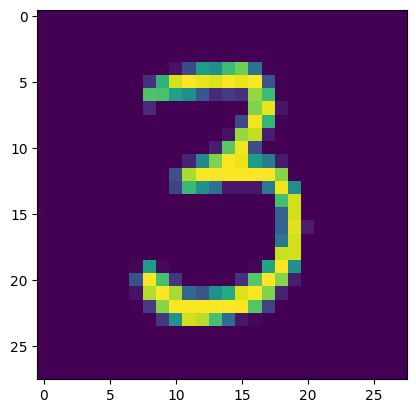

3


In [9]:
# displaying the image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

Image Labels

In [10]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [11]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in X_train
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Emcoding

All the images have the same dimensions in this dataset, if not, we have to resize all the images to a common dimension

In [12]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [13]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [14]:
# setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [15]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3144 - accuracy: 0.9087
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1469 - accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1067 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0697 - accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0516 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0448 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0388 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.035

Training data accuracy = 98.84%

**Accuracy on Test data:**

In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.9735
0.9735000133514404


Test data accuracy = 97.35%

In [18]:
print(X_test.shape)

(10000, 28, 28)


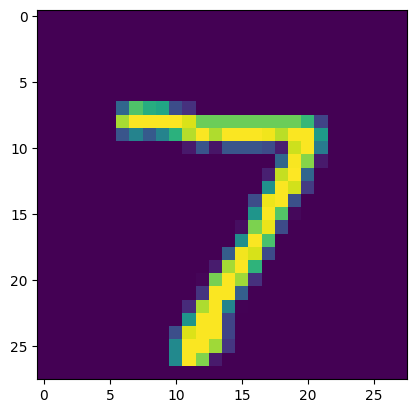

In [19]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [20]:
print(Y_test[0])

7


In [21]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
print(Y_pred.shape)

(10000, 10)


In [23]:
print(Y_pred[0])

[2.5271845e-01 3.0443852e-04 5.1990056e-01 9.6239060e-01 2.9232040e-06
 2.1936053e-03 3.6548933e-10 9.9999738e-01 2.0812521e-02 1.2654641e-01]


model.predict() gives the prediction of each class of that data point

In [24]:
# converting the prediction probabilities to class label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [25]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted labels

Confusion Matrix

In [27]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [28]:
print(conf_mat)

tf.Tensor(
[[ 964    0    2    1    1    2    3    0    5    2]
 [   0 1120    3    2    0    1    5    1    3    0]
 [   2    1 1006    6    1    1    2    6    5    2]
 [   0    0    5  961    0   14    0    5   11   14]
 [   2    0    1    1  941    3    6    1    2   25]
 [   3    0    0    5    0  868    2    0    5    9]
 [   2    2    0    1    4    7  939    0    2    1]
 [   1    1    8    2    0    0    0 1002    3   11]
 [   3    1    4    3    3   10    0    4  941    5]
 [   0    2    0    3    5    2    1    3    0  993]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

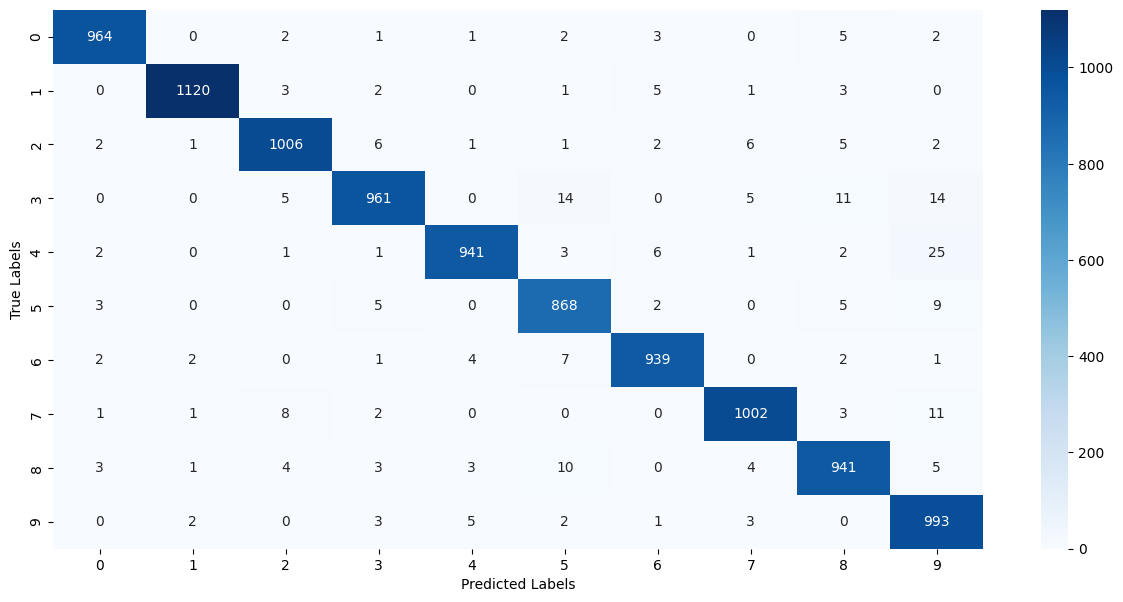

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [30]:
!wget 'https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png'

--2024-07-18 04:54:31--  https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png
Resolving machinelearningmastery.com (machinelearningmastery.com)... 104.26.0.148, 172.67.72.46, 104.26.1.148, ...
Connecting to machinelearningmastery.com (machinelearningmastery.com)|104.26.0.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34970 (34K) [image/png]
Saving to: ‘sample_image.png’

sample_image.png    100%[===================>]  34.15K  --.-KB/s    in 0.01s   

2024-07-18 04:54:31 (2.69 MB/s) - ‘sample_image.png’ saved [34970/34970]



In [31]:
!wget 'https://i.sstatic.net/CFjPz.png'

--2024-07-18 04:55:16--  https://i.sstatic.net/CFjPz.png
Resolving i.sstatic.net (i.sstatic.net)... 172.64.146.223, 104.18.41.33
Connecting to i.sstatic.net (i.sstatic.net)|172.64.146.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9537 (9.3K) [image/png]
Saving to: ‘CFjPz.png’

CFjPz.png           100%[===================>]   9.31K  --.-KB/s    in 0s      

2024-07-18 04:55:16 (71.8 MB/s) - ‘CFjPz.png’ saved [9537/9537]



In [32]:
input_image_path = '/content/CFjPz.png'

input_image = cv2.imread(input_image_path)

In [33]:
type(input_image)

numpy.ndarray

In [34]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


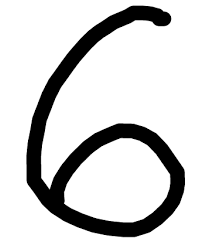

In [35]:
cv2_imshow(input_image)

In [36]:
input_image.shape

(242, 220, 3)

In [37]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [38]:
grayscale.shape

(242, 220)

In [39]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [41]:
input_image_resize.shape

(28, 28)

In [42]:
cv2_imshow(input_image_resize)

In [43]:
input_image_resize = input_image_resize/255

In [44]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [45]:
inbput_prediction = model.predict(image_reshaped)
print(inbput_prediction)

1/1 [==============================] - 0s 44ms/step
[[3.2182118e-10 7.0893575e-06 1.0000000e+00 1.0000000e+00 3.4296911e-25
  1.0000000e+00 8.6279123e-15 8.0950749e-01 9.5419371e-01 3.4073751e-12]]


In [46]:
input_pred_label = np.argmax(inbput_prediction)

In [47]:
print(input_pred_label)

2


**Predictive System**

In [51]:
input_image_path = input('Path of the image to be predicted!')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten digit is recognises as ', input_pred_label)

Path of the image to be predicted!/content/img_2.jpg


1/1 [==============================] - 0s 23ms/step
The Handwritten digit is recognises as  5
